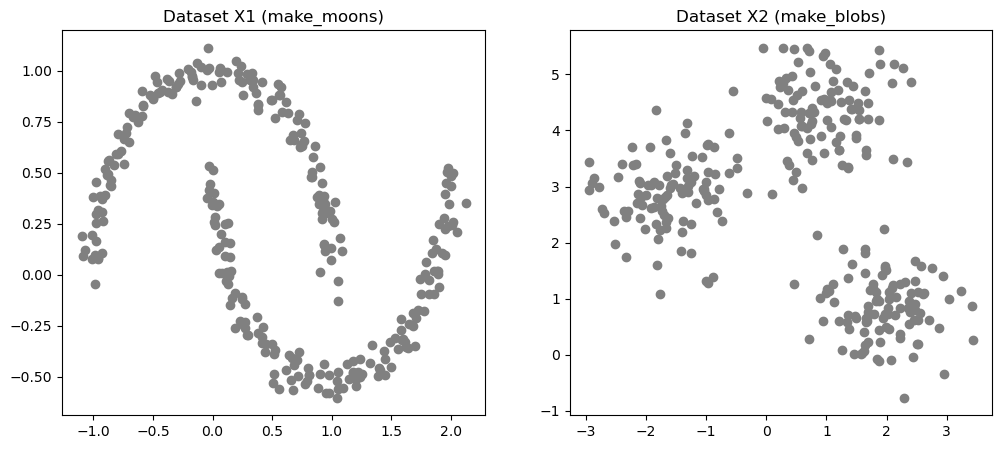

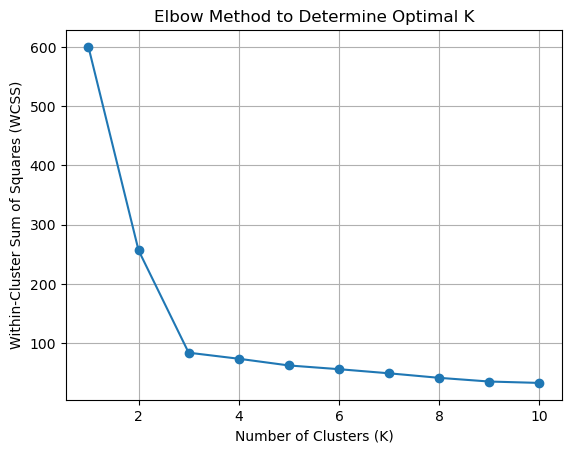

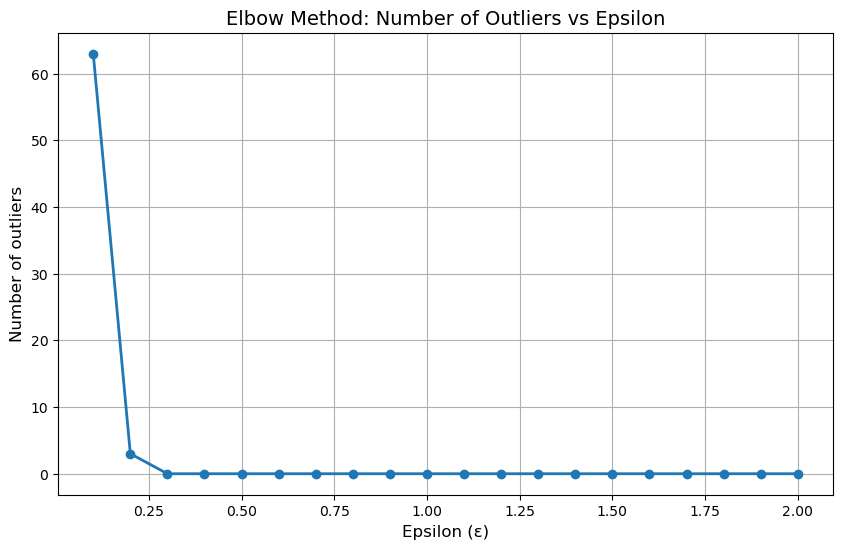



Optimal epsilon from elbow method: 0.30
This gives 0 outliers



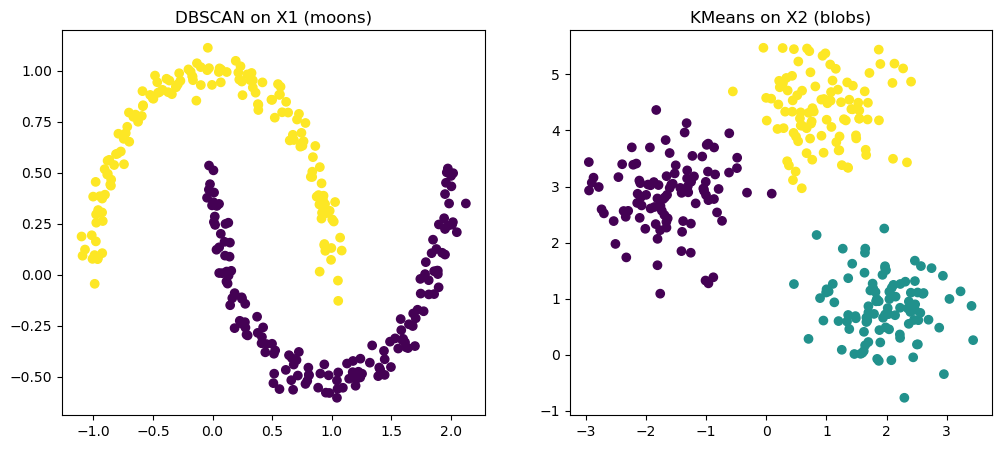

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# create data
X1, _ = make_moons(n_samples=300, noise=0.05, random_state=0)
X2, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Exercise 1
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(X1[:, 0], X1[:, 1], c='gray')
axes[0].set_title("Dataset X1 (make_moons)")
axes[1].scatter(X2[:, 0], X2[:, 1], c='gray')
axes[1].set_title("Dataset X2 (make_blobs)")
plt.show()
print()

# Exercise 2
# X1 - non-spherical shape so it's better to use DBSCAN model
# X2 - round clusters so it's better to use KMeans model

# Exercise 3
# Apply feature scaling
scaler = StandardScaler()
df_X2_scaled = scaler.fit_transform(X2)

# Calculate the sum of squared distances (SSD) for K values from 1 to 10
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_X2_scaled)
    ssd.append(kmeans.inertia_)
    
# Elbow method plot
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method to Determine Optimal K")
plt.grid(True)
plt.show()

print()

# --------- Different MinPoints Values ---------
df_X1_scaled = scaler.fit_transform(X1)
df_X1 = pd.DataFrame(df_X1_scaled, columns=['x', 'y'])

# --------- Elbow Method for Finding Optimal Epsilon ---------
eps_range = np.linspace(0.1, 2.0, 20)
min_points = df_X1.shape[1] * 2
number_of_outliers = []

for eps in eps_range:
    dbscan = DBSCAN(eps=eps, min_samples=min_points)
    labels = dbscan.fit_predict(df_X1)
    number_of_outliers.append(np.sum(labels == -1))

# Plot number of outliers vs epsilon
plt.figure(figsize=(10, 6))
plt.plot(eps_range, number_of_outliers, 'o-', linewidth=2)
plt.xlabel('Epsilon (ε)', fontsize=12)
plt.ylabel('Number of outliers', fontsize=12)
plt.title('Elbow Method: Number of Outliers vs Epsilon', fontsize=14)
plt.grid(True)
plt.show()
print()

# Find optimal epsilon value (where outliers stabilize)
# A heuristic approach to find the "elbow" point
diff = np.diff(number_of_outliers)
elbow_index = np.where(abs(diff) < 0.5)[0][0] if len(np.where(abs(diff) < 0.5)[0]) > 0 else 0
optimal_eps = eps_range[elbow_index]

print(f"\nOptimal epsilon from elbow method: {optimal_eps:.2f}")
print(f"This gives {number_of_outliers[elbow_index]} outliers")
print()

kmeans = KMeans(n_clusters=3, random_state=0)
km_labels = kmeans.fit_predict(X2)

dbscan = DBSCAN(eps=0.3, min_samples=min_points)
db_labels = dbscan.fit_predict(X1)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(X1[:, 0], X1[:, 1], c=db_labels, cmap='viridis')
axes[0].set_title("DBSCAN on X1 (moons)")
axes[1].scatter(X2[:, 0], X2[:, 1], c=km_labels, cmap='viridis')
axes[1].set_title("KMeans on X2 (blobs)")
plt.show()